# UMAP Visualization: PKS vs non-PKS

Loads precomputed UMAP embeddings and plots them, colored by label.
Embeddings expected in `pks_nonpks_umap_embeddings.parquet` generated by the UMAP script.

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prefer the provided absolute path; fallback to repo-relative path
abs_path = Path('/Users/yashchainani/Desktop/PythonProjects/ContrastiveGNNs/data/processed/pks_nonpks_umap_embeddings.parquet')
rel_path = Path('..') / 'data' / 'processed' / 'pks_nonpks_umap_embeddings.parquet'
in_path = abs_path if abs_path.exists() else rel_path
print('Reading embeddings from:', in_path)
df = pd.read_parquet(in_path)
df.head()


Reading embeddings from: /Users/yashchainani/Desktop/PythonProjects/ContrastiveGNNs/data/processed/pks_nonpks_umap_embeddings.parquet


,smiles,source,split,umap_1,umap_2,is_pks
0,CCCCCCC1OC(=O)C1C,PKS,train,-0.281818,-0.700225,PKS
1,CCCCCCC(=O)C(C)C(=O)O,PKS,train,-1.459831,-10.728127,PKS
2,CCCCCCC=C(C)C(=O)O,PKS,train,-5.139313,-8.269760,PKS
3,CCCCCCCC(C)C(=O)O,PKS,train,-127.521576,-57.468475,PKS
4,CCCCC1OC(=O)CCC1C,PKS,train,-1.421068,5.285004,PKS


In [2]:
# Verify columns and derive label
required = {'umap_1', 'umap_2'}
missing = required - set(df.columns)
if missing:
    raise ValueError(f'Missing required columns: {missing}')

if 'is_pks' in df.columns:
    df['label'] = df['is_pks'].astype(str)
else:
    # Build label from source
    if 'source' not in df.columns:
        raise ValueError('Expected either is_pks or source column')
    df['label'] = df['source'].astype(str).where(df['source'] == 'PKS', 'non-PKS')

df['label'].value_counts()


non-PKS    4032122
PKS          13312
Name: label, dtype: int64

In [3]:
# Optional: subsample for plotting performance (set to None for full plot)
MAX_POINTS = 300000  # adjust or set to None for all points
if MAX_POINTS is not None and len(df) > MAX_POINTS:
    df_plot = df.sample(MAX_POINTS, random_state=42)
    print(f'Subsampled to {len(df_plot):,} points for plotting')
else:
    df_plot = df
len(df_plot)


Subsampled to 300,000 points for plotting


300000

Saved figure to ../data/processed/pks_nonpks_umap_viz.png


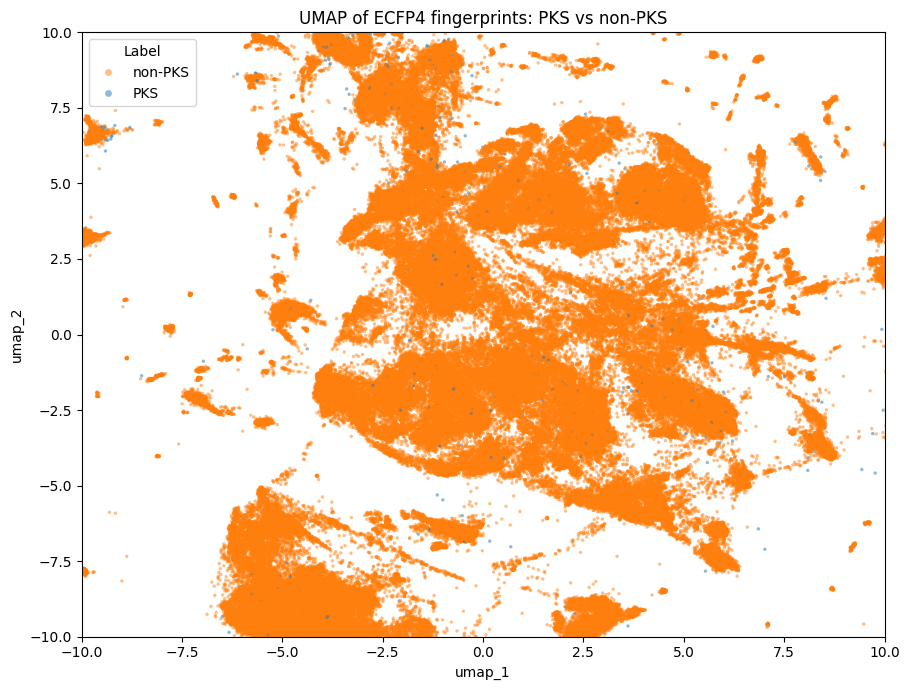

In [7]:
# Plot with a high-contrast palette (bright blue vs red)
sns.set_style('white')
plt.figure(figsize=(9, 7), facecolor='white')
palette = {'PKS': '#0C7BDC', 'non-PKS': '#D62728'}
sns.scatterplot(
    data=df_plot, x='umap_1', y='umap_2', hue='label',
    palette=palette, s=12, linewidth=0, alpha=0.7, rasterized=True
)
plt.title('UMAP of ECFP4 fingerprints: PKS vs non-PKS', fontsize=13)
plt.legend(title='Label', markerscale=2)
plt.tight_layout()
out_png = Path('..') / 'data' / 'processed' / 'pks_nonpks_umap_viz.png'
out_png.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(out_png, dpi=300)
print('Saved figure to', out_png)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()
